# Describe dataset

# Exploratory Data Analysis  (notes)


1) Inspection of single variables
    - Summary statistics: 5-number summary, mean, variance, stem-and-leaf display, box-plot, histograms, density plots


2) Bi- and multivariate inspection
    - Contingency tables, mosaic plot, scatter-plot, group stratified plots


3) Quantification of the above
    - Association: suitable measures e.g. covariance, Pearson or rank correlation.
    - Difference: suitable hypothesis tests, e.g. t-test, Wilcoxon signed rank test

In [1]:
# Libraries
import pandas as pd
import numpy  as np
from matplotlib import pyplot as plt
import datetime as dt
import seaborn as sns
from pandas import Series

# 1) Reviewing data, initial analysis

In [2]:
plt.figure(figsize=(50, 50), dpi= 100, facecolor='w', edgecolor='k')

<Figure size 5000x5000 with 0 Axes>

<Figure size 5000x5000 with 0 Axes>

In [3]:
feature_df = pd.read_csv("features.csv")
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
store_df = pd.read_csv("stores.csv")

In [4]:
feature_df.head()

,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [5]:
feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
Store           8190 non-null int64
Date            8190 non-null object
Temperature     8190 non-null float64
Fuel_Price      8190 non-null float64
Promotion1      4032 non-null float64
Promotion2      2921 non-null float64
Promotion3      3613 non-null float64
Promotion4      3464 non-null float64
Promotion5      4050 non-null float64
CPI             7605 non-null float64
Unemployment    7605 non-null float64
IsHoliday       8190 non-null bool
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 711.9+ KB


In [6]:
train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [8]:
test_df.head()

,Store,Dept,Date,IsHoliday,Weekly_Sales to be predicted
0,1,1,02/11/2012,False,NaN
1,1,1,09/11/2012,False,NaN
2,1,1,16/11/2012,False,NaN
3,1,1,23/11/2012,True,NaN
4,1,1,30/11/2012,False,NaN


In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 5 columns):
Store                           115064 non-null int64
Dept                            115064 non-null int64
Date                            115064 non-null object
IsHoliday                       115064 non-null bool
Weekly_Sales to be predicted    0 non-null float64
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 3.6+ MB


In [10]:
store_df.head()

,Store,Type,Size (sq ft)
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [11]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
Store           45 non-null int64
Type            45 non-null object
Size (sq ft)    45 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.1+ KB


### We first need to analyse the datatypes for each variable stored in the tables (columns). 


Feature_df (8189 rows)
- Date: needs to be converted into a datetime dtype as we can't use it currently in any graph as a type error would be thrown.
- IsHoliday: is a categorical dtype, we can definitely use it to categorise data and compare relations between holidays and non-holidays.


Train_df (421569 rows)
- Date: needs to be converted into datetime dtype for reasons mentiond above.


Test_df (115063 rows)
- Date: needs to be converted into datetime dtype for reasons mentiond above.

In [12]:
# Check if Null values exist
def null_checker(dataframe_column):
    return dataframe_column.isnull().sum().sum()

# Using the null_checker function we wrote above, we can now tabulate the variables with missing values for all tables to get a better picture of missing data and its potential impact:


|                 | Stores | Features | Test   | Train |
|-----------------|--------|----------|--------|-------|
| Store           | 0      | 0        | 0      | 0     |
| Type            | 0      |          |        |       |
| Size            | 0      |          |        |       |
| Date            |        | 0        | 0      | 0     |
| Temp            |        | 0        |        |       |
| Fuel_P          |        | 0        |        |       |
| Promotion1      |        | 4158     |        |       |
| Promotion2      |        | 5269     |        |       |
| Promotion3      |        | 4577     |        |       |
| Promotion4      |        | 4726     |        |       |
| Promotion5      |        | 4140     |        |       |
| CPI             |        | 585      |        |       |
| Unemployment    |        | 585      |        |       |
| IsHoliday       |        | 0        | 0      | 0     |
| Department      |        |          | 0      | 0     |
| Weekly_Sales    |        |          |        | 0     |
| Weekly_Salestbp |        |          | 115064 |       |

# 2) Some initial exploratory analysis of the data before we merge the tables.

In [13]:
# Lets output the summary statistics of the tables we want to focus on
feature_df.describe()

,Store,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [14]:
train_df.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


Both tables feature and train are analysed further using the 5 number summary and the percentage of NaN data. The `fuel_price` and `unemployment` are closer to the expected value (mean) where as `Promotions 1 to 5` have a high standard deviation meaning they are spread out over a wider range of values. The reason for this is because  Promotions 1 to 5 have a lot of missing data. So does CPI thus it has a high standard deviation. 


In the table `train` the `store` variable has a very similar standard deviation with the `store` variable in  `feature_df` meaning they  can be merged. We have over `+421000` weekly sales records, this can help us predict future sales using an ML model.

I didn't output the 5 number summary for tables `test` or `stores` because they hardly contain any variables that can be statistically analysed, mainly its categorical data not continuous.

In [15]:
feature_df  = feature_df.fillna(0)

### Standard deviation
A low standard deviation indicates that the data points tend to be close to the mean (also called the expected value) of the set, while a high standard deviation indicates that the data points are spread out over a wider range of values.

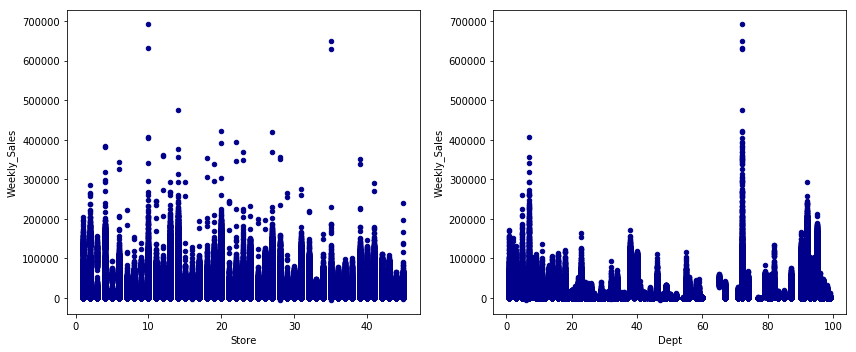

In [16]:
%matplotlib inline
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))  # 1 row, 2 columns
train_df.plot.scatter(x = "Store", y = "Weekly_Sales", color = 'DarkBlue', ax=ax1)
train_df.plot.scatter(x = "Dept", y = "Weekly_Sales", color = 'DarkBlue', ax=ax2)
plt.tight_layout()

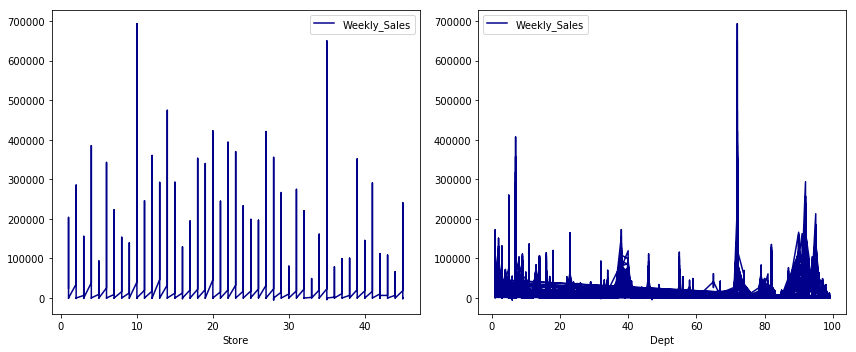

In [17]:
%matplotlib inline
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))
train_df.plot.line(x='Store', y='Weekly_Sales', ax=ax1, color = 'DarkBlue')
train_df.plot.line(x='Dept', y='Weekly_Sales', ax=ax2, color = 'DarkBlue')
plt.tight_layout() 

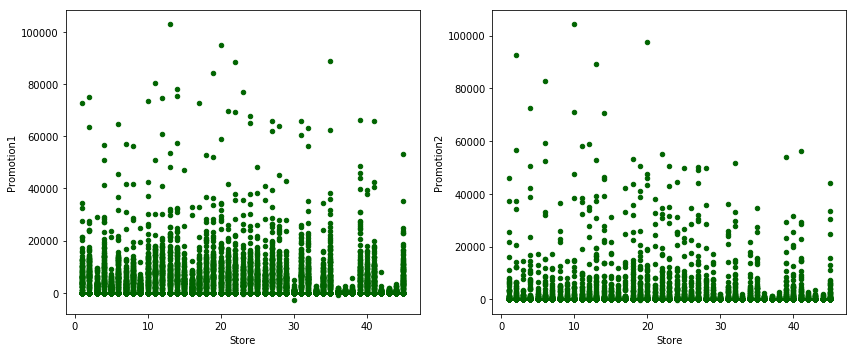

In [18]:
%matplotlib inline
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))
feature_df.plot.scatter(x = "Store", y = "Promotion1", color = 'DarkGreen', ax=ax1)
feature_df.plot.scatter(x = "Store", y = "Promotion2", color = 'DarkGreen', ax=ax2)
plt.tight_layout() 

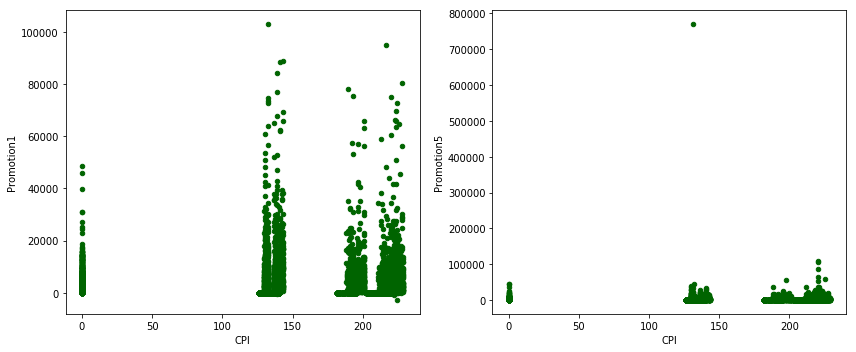

In [19]:
%matplotlib inline
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))
feature_df.plot.scatter(x = "CPI", y = "Promotion1", color = 'DarkGreen', ax=ax1)
feature_df.plot.scatter(x = "CPI", y = "Promotion5", color = 'DarkGreen',ax=ax2)
plt.tight_layout() 

## The scatter plots don't  inform us clearly about missing  data, however, we can clearly identify some outliers in some  of  the graphs. For `promotions 1` and  `2` we can see very similar trends where stores have more low value promotions and less high value promotions. For `promotion 5` we can clearly see a common trend of very low values of promotion across all 45 stores but one promotion value between `700000` and `800000`.

In [20]:
# We will visualise continuity with line plot graphs
feature_df['Date'] =  pd.to_datetime(feature_df['Date'],
                              format='%d/%m/%Y')

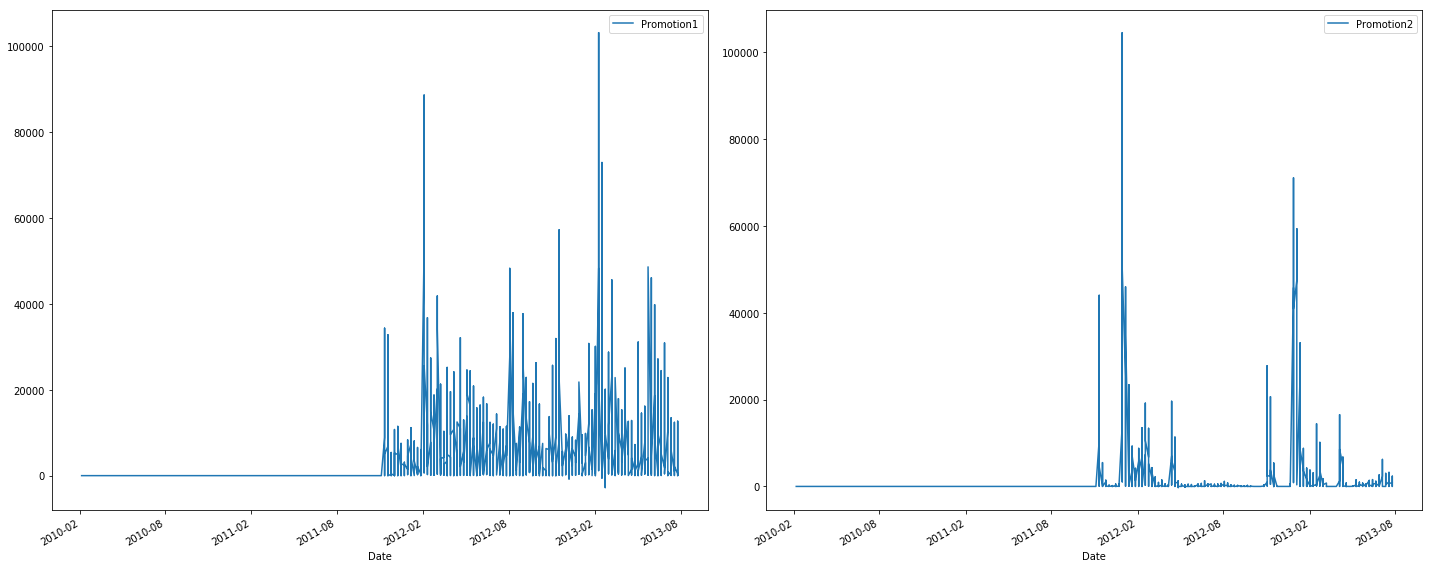

In [21]:
%matplotlib inline
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,8))
feature_df.plot.line(x='Date', y='Promotion1', ax=ax1)
feature_df.plot.line(x='Date', y='Promotion2', ax=ax2)
plt.tight_layout() 

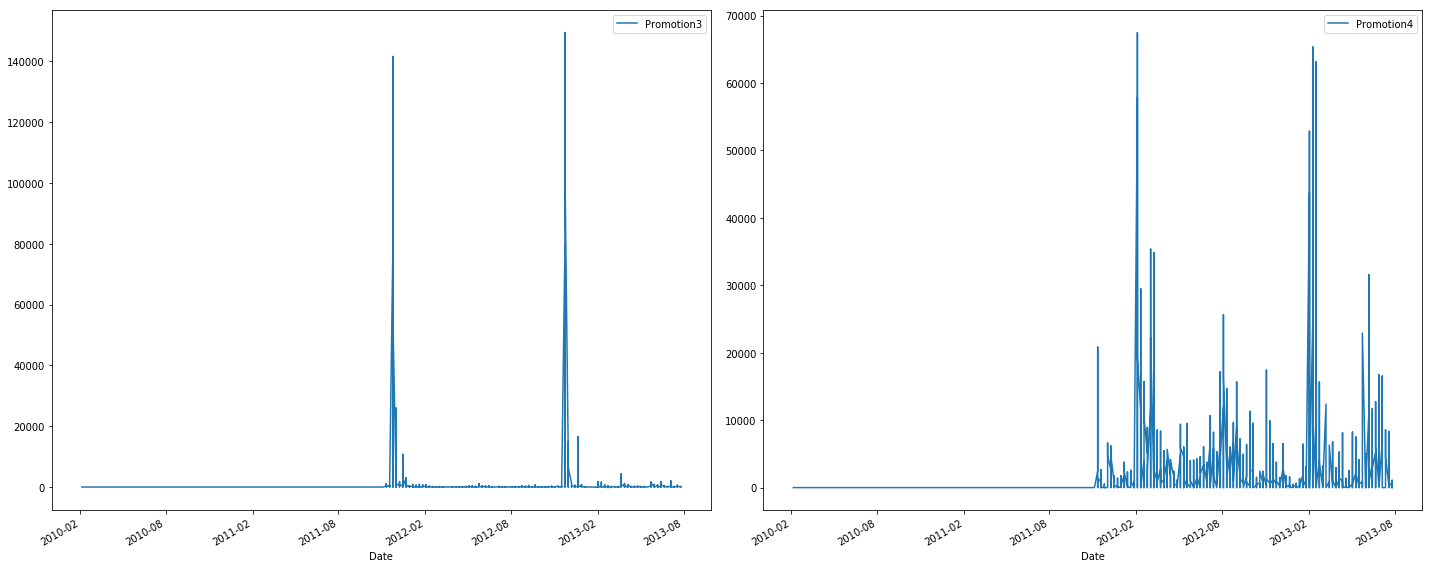

In [22]:
%matplotlib inline
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,8))
feature_df.plot.line(x='Date', y='Promotion3', ax=ax1)
feature_df.plot.line(x='Date', y='Promotion4', ax=ax2)
plt.tight_layout() 

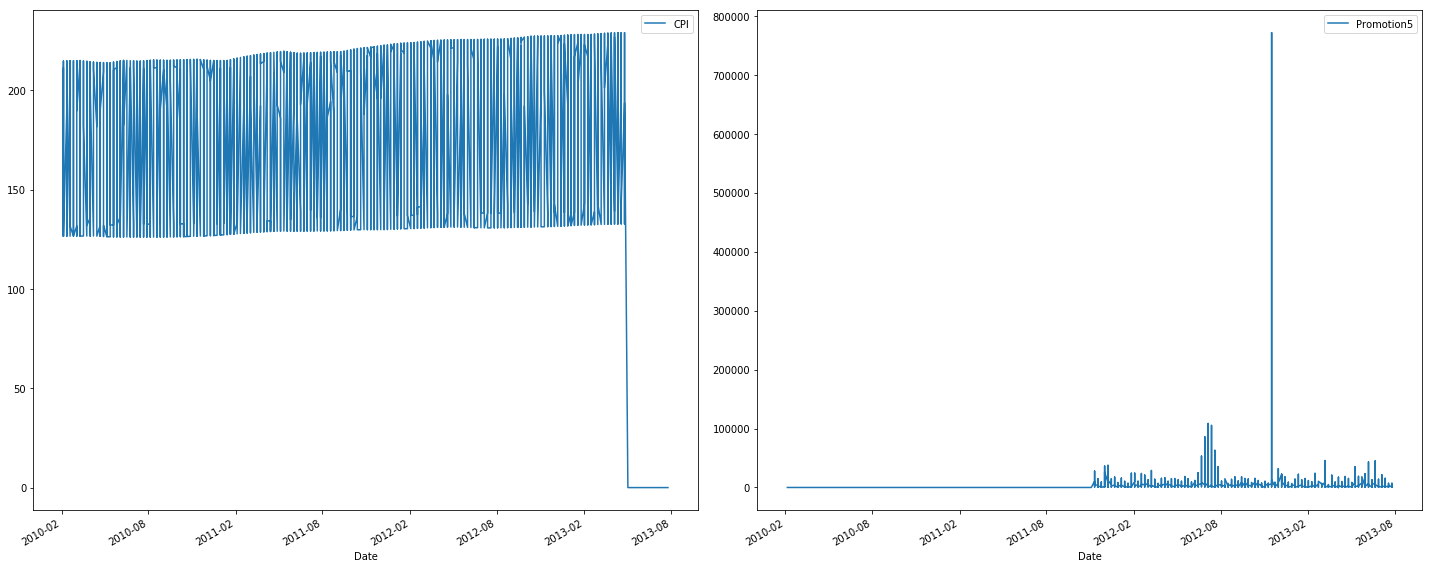

In [23]:
%matplotlib inline
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,8))
feature_df.plot.line(x='Date', y='CPI', ax=ax1)
feature_df.plot.line(x='Date', y='Promotion5', ax=ax2)
plt.tight_layout() 

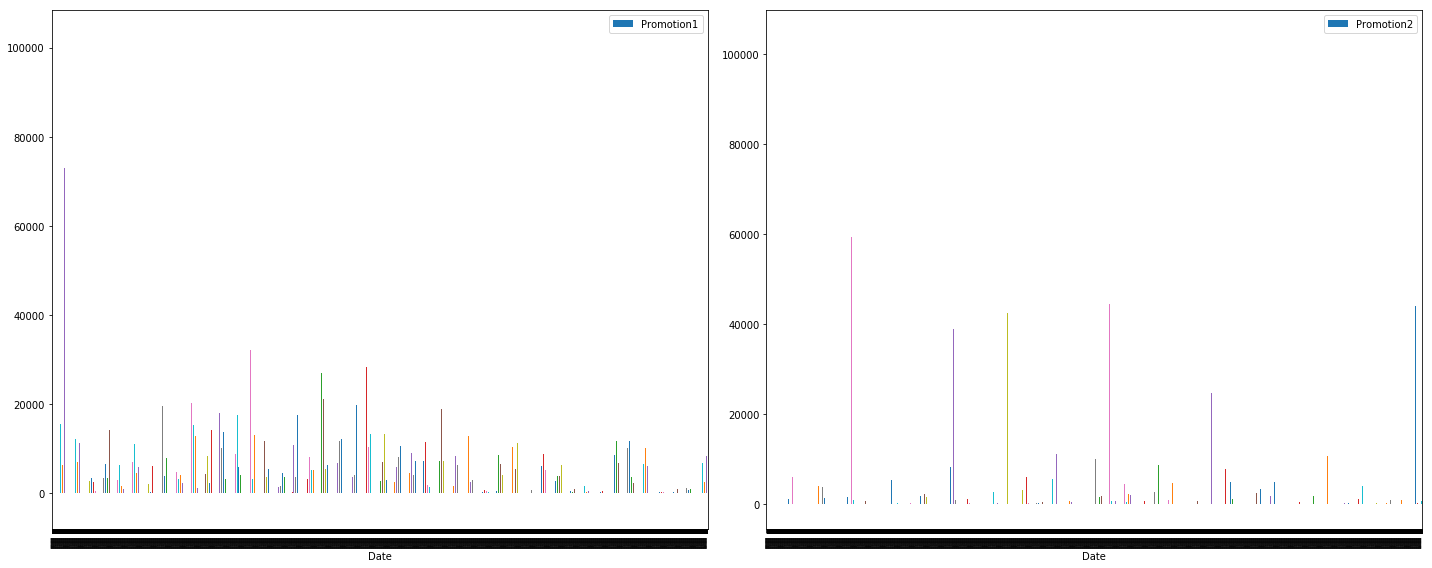

In [27]:
%matplotlib inline
plt.rcParams['xtick.labelsize'] = 0.2
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,8))
feature_df.plot.bar(x='Date', y='Promotion1', ax=ax1)
feature_df.plot.bar(x='Date', y='Promotion2', ax=ax2)
plt.tight_layout() 

## We can see after running the function null_checker that the number of empty rows for promotions 1..5 vary. The promotion with the most values filled is `Promotion 5`

In [18]:
feature_df.Promotion1

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
5            NaN
6            NaN
7            NaN
8            NaN
9            NaN
10           NaN
11           NaN
12           NaN
13           NaN
14           NaN
15           NaN
16           NaN
17           NaN
18           NaN
19           NaN
20           NaN
21           NaN
22           NaN
23           NaN
24           NaN
25           NaN
26           NaN
27           NaN
28           NaN
29           NaN
          ...   
8160     1341.33
8161     3877.36
8162    14746.10
8163     3130.28
8164    14508.96
8165    53311.88
8166     9362.02
8167    10781.51
8168     6614.32
8169    16382.54
8170     9867.03
8171    11923.74
8172     5444.00
8173    16427.83
8174     8760.15
8175     1399.81
8176     1260.65
8177     8345.40
8178     4689.18
8179     4515.35
8180     3249.34
8181     6474.49
8182     9977.82
8183     2471.44
8184     4989.34
8185     4842.29
8186     9090.48
8187     3789.

Regarding quality of the datasets. The values stored is mainly floating point but what does that indicate specifically? Is it a percentage of promotion? An example of data for `Promotion1` is `53311.88`. Clearly it's price reductions still the values are not very informative. We have some categorical data which would be very useful i.e. `IsHoliday` to try filter the data focusing on holiday promotions and non-holiday promotions. Weekly sales to be predicted is all `Null` but the number of rows can give us a picture of the amount of data we have to produce which is: 115064. We definitely will be using  `Weekly_Sales` with `Promotions` and `IsHolidays` with `Dates` to try predict the Sales Forecasting on the `Department` level. The data quality is ok I guess as many key variables required to predict the `Sales forecasts` are provided like `Department`, `IsHoliday`, `WeeklySales`, `Date` and so on. The main problem is we don't have all the data for `Promotions` this too is a key variable and  without it, we can't make accurate predictions of weekly sales. At least, however, we have some data thus we can try predict the missing data using methods like time series analysis.

# Let us now merge the `features`, `train` and `store` tables

### First we will convert the `Date` columns to `DateTime` dtypes

In [20]:
train_df['Date'] = pd.to_datetime(train_df['Date'], format='%d/%m/%Y')

In [21]:
test_df['Date'] = pd.to_datetime(test_df['Date'], format = '%d/%m/%Y')

In [22]:
# Merging tables store_df
store_feature_merged_df = pd.merge(feature_df, store_df, on='Store')

In [23]:
store_feature_merged_df.head()

,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,CPI,Unemployment,IsHoliday,Type,Size (sq ft)
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [24]:
store_feature_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8190 entries, 0 to 8189
Data columns (total 14 columns):
Store           8190 non-null int64
Date            8190 non-null datetime64[ns]
Temperature     8190 non-null float64
Fuel_Price      8190 non-null float64
Promotion1      4032 non-null float64
Promotion2      2921 non-null float64
Promotion3      3613 non-null float64
Promotion4      3464 non-null float64
Promotion5      4050 non-null float64
CPI             7605 non-null float64
Unemployment    7605 non-null float64
IsHoliday       8190 non-null bool
Type            8190 non-null object
Size (sq ft)    8190 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(9), int64(2), object(1)
memory usage: 903.8+ KB


In [25]:
# Merging tables store_feature_merged_df with train_df
final_df = pd.merge(train_df, store_feature_merged_df)

In [26]:
final_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,CPI,Unemployment,Type,Size (sq ft)
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [27]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null datetime64[ns]
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
Promotion1      150681 non-null float64
Promotion2      111248 non-null float64
Promotion3      137091 non-null float64
Promotion4      134967 non-null float64
Promotion5      151432 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
Type            421570 non-null object
Size (sq ft)    421570 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(10), int64(3), object(1)
memory usage: 51.9+ MB


In [28]:
final_df['Date'].min()

Timestamp('2010-02-05 00:00:00')

In [29]:
final_df['Date'].max()

Timestamp('2012-10-26 00:00:00')

## We have an advanced technique to impute missing data, we need to fill in the missing data to perform regression/NN models on the dataset. The most advanced method is deep learning imputation using Datawig library.
- Imputation using Deep Learning (Datawig), link: https://datawig.readthedocs.io/en/latest/index.html
The variables that are closely correlated to Promotions and CPI are ['Weekly_Sales', 'Temperature', 'Fuel_Price',
    'Promotion5', 'Promotion4', 'CPI', 'Promotion2', 'Promotion3', 'Promotion1']. I also calculated the `R2_score` to see how accurate the imputed values are from the training data.

### As DATAWIG is not compatible with Anaconda, I had to write the python script and execute the script using terminal
```
# Libraries used
import datawig
import pandas as pd
from sklearn.metrics import r2_score as score

# After imputing final_df.csv we clean the data by rounding to 1 decimal place and filling the null values for
# the f2_score metric to not throw an error regarding float size or null values.
df = pd.read_csv('final_df.csv')
df = df.round(1)
df = df.fillna(0)

# Split the dataset into training and test data, 80% to %20
df_train, df_test = datawig.utils.random_split(df, split_ratios=[0.8, 0.2])

# Creating the SimpleImputer object, the input columns are the columns we believe are relevant in calculating the
# Promotions. Output_column is the column we are imputing the values for. The output_path is the output log.
imputer = datawig.SimpleImputer(
    input_columns = ['Weekly_Sales', 'Temperature', 'Fuel_Price',
    'Promotion5', 'Promotion4', 'CPI', 'Promotion2', 'Promotion3'],
    output_column = 'Promotion1',
    output_path = 'imputer_model'
)

# We fit the training data and state the number of epochs 
imputer.fit(train_df=df_train, num_epochs = 50)

# The imputed dataframe is produced.
imputed = imputer.predict(df_test)

# We calculate the f2_score for the Promotion1 and the Imputed Promotion1
f1 = score(imputed['Promotion1'], imputed['Promotion1_imputed'])
print('Promotion1 f2_score: ', f1)```

## The problem with Datawig is that it only imputes values for one column so I had to repeat the algorithm above 6 times for all the promotions and CPI.

# The R2_score for all 6 imputations:

- **Promotion1** f2_score:  **0.8796632334818133**
- **Promotion2** f2_score:  **0.6603054641256494**
- **Promotion3** f2_score:  **0.4918742528293464**
- **Promotion4** f2_score:  **0.8915634612104615**
- **Promotion5** f2_score:  **0.5287041047093568**
- **CPI**        f2_score:  **0.35543474289083**

In [32]:
# Let us now read in our csv files with imputed columns.
Promotion1_imputed = pd.read_csv('Promotion1_imputed.csv')
Promotion2_imputed = pd.read_csv('Promotion2_imputed.csv')
Promotion3_imputed = pd.read_csv('Promotion3_imputed.csv')
Promotion4_imputed = pd.read_csv('Promotion4_imputed.csv')
Promotion5_imputed = pd.read_csv('Promotion5_imputed.csv')
CPI_imputed = pd.read_csv('CPI_imputed.csv')

## We add all the imputed columns to new final_df

In [34]:
Promotion1_imputed['Promotion2_imputed'] = Promotion2_imputed['Promotion2_imputed']

In [36]:
Promotion1_imputed['Promotion3_imputed'] = Promotion3_imputed['Promotion3_imputed']

In [37]:
Promotion1_imputed['Promotion4_imputed'] = Promotion4_imputed['Promotion4_imputed']

In [38]:
Promotion1_imputed['Promotion5_imputed'] = Promotion5_imputed['Promotion5_imputed']

In [39]:
Promotion1_imputed['CPI_imputed'] = CPI_imputed['CPI_imputed']

In [40]:
final_df = Promotion1_imputed

In [43]:
final_df['Date'] =  pd.to_datetime(final_df['Date'],
                              format='%Y-%m-%d')

## Exploratory statistics of the new final_df

In [45]:
final_df.describe()

,Unnamed: 0,Unnamed: 0.1,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,...,Promotion5,CPI,Unemployment,Size (sq ft),Promotion1_imputed,Promotion2_imputed,Promotion3_imputed,Promotion4_imputed,Promotion5_imputed,CPI_imputed
count,84314.000000,84314.000000,84314.000000,84314.000000,84314.000000,84314.000000,84314.000000,84314.000000,84314.000000,84314.000000,...,84314.000000,84314.000000,84314.000000,84314.000000,84314.000000,84314.000000,84314.000000,84314.000000,84314.000000,84314.000000
mean,210695.293308,210695.293308,22.189316,44.185533,15935.248214,60.147537,3.363520,2564.187586,868.011879,480.725934,...,1637.820726,171.133193,7.959815,136803.747586,2544.707231,788.006721,283.484859,1004.982256,1612.671382,167.410277
std,121565.178299,121565.178299,12.772008,30.502129,22847.804120,18.423663,0.458413,6012.202218,5113.540507,5621.333288,...,4102.261148,39.159104,1.856633,61075.999005,5332.792499,3956.952610,3384.971164,3662.928095,2937.459257,23.474207
min,2.000000,2.000000,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,...,0.000000,126.064000,3.879000,34875.000000,-4625.325035,-23805.312916,-19080.561019,-3528.381807,-2887.803337,53.983860
25%,105807.250000,105807.250000,11.000000,18.000000,2105.597500,46.780000,2.935000,0.000000,0.000000,0.000000,...,0.000000,132.022667,6.891000,93638.000000,29.789442,-514.410583,-487.320325,-158.023671,-61.477479,151.029090
50%,210538.500000,210538.500000,22.000000,37.000000,7593.705000,62.185000,3.461000,0.000000,0.000000,0.000000,...,0.000000,182.256960,7.866000,140167.000000,304.071051,154.789129,-1.750390,0.437286,242.647013,164.955086
75%,315599.500000,315599.500000,33.000000,72.000000,20098.727500,74.290000,3.738000,2779.970000,1.750000,4.300000,...,2156.750000,212.403576,8.567000,202505.000000,3460.881498,1047.966028,458.750220,742.598529,2892.723862,186.146118
max,421560.000000,421560.000000,45.000000,99.000000,649770.180000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,...,108519.280000,227.232807,14.313000,219622.000000,84277.038888,73354.229227,100960.170556,65524.221179,37100.669184,231.689593


In [46]:
final_df = final_df.drop(axis = 1, columns = 'Unnamed: 0')

In [47]:
final_df = final_df.drop(axis = 1, columns = 'Unnamed: 0.1')

In [48]:
final_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,...,CPI,Unemployment,Type,Size (sq ft),Promotion1_imputed,Promotion2_imputed,Promotion3_imputed,Promotion4_imputed,Promotion5_imputed,CPI_imputed
0,25,24,2012-08-24,4038.41,False,64.53,3.834,7693.13,69.6,50.00,...,214.956704,7.280,B,128107,8787.754929,806.574409,56.856950,1380.410153,5518.467382,170.801283
1,25,71,2012-07-13,3700.50,False,73.87,3.523,7262.73,45.6,18.01,...,214.728027,7.280,B,128107,4120.744637,2283.356560,-1142.794812,2229.470544,5680.885331,190.443180
2,5,21,2011-01-14,1013.33,False,37.74,2.983,0.00,0.0,0.00,...,212.008514,6.634,B,34875,-277.696923,-555.449053,-322.422134,548.093104,-76.214239,155.448629
3,12,13,2011-11-25,44972.99,True,53.25,3.622,5391.83,8.0,63143.29,...,129.836400,12.890,B,112238,684.982010,-2577.924568,14896.869918,2000.297302,262.989837,127.964379
4,32,31,2011-05-06,1919.06,False,46.65,3.735,0.00,0.0,0.00,...,192.725201,8.595,A,203007,-213.124242,72.496990,-2475.886981,-371.035826,343.612922,149.990982


In [49]:
final_df['Date'].min()

Timestamp('2010-02-05 00:00:00')

In [50]:
final_df['Date'].max()

Timestamp('2012-10-26 00:00:00')

## We successfully merged tables `Store`, `Features` and `Train` after converting `Date` to `DateTime` we can get the `minimum` and `maximum` dates. The minimum date is `2010-02-05` and the maximum date is `2012-10-26`. I now want to try categorise the data based on year and see which years have the most promotional data.

In [35]:
feature_test_df = pd.merge(feature_df, test_df, on = 'Store')

In [36]:
train_df = train_df.drop(axis = 1, columns = ['IsHoliday'])

In [37]:
concat_list = [feature_test_df, train_df]

In [38]:

feature_test_df_v1 = pd.concat(concat_list, ignore_index=False, axis = 1)

In [39]:
feature_test_df_v1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20941648 entries, 0 to 20941647
Data columns (total 20 columns):
Store                           int64
Date_x                          datetime64[ns]
Temperature                     float64
Fuel_Price                      float64
Promotion1                      float64
Promotion2                      float64
Promotion3                      float64
Promotion4                      float64
Promotion5                      float64
CPI                             float64
Unemployment                    float64
IsHoliday_x                     bool
Dept                            int64
Date_y                          datetime64[ns]
IsHoliday_y                     bool
Weekly_Sales to be predicted    float64
Store                           float64
Dept                            float64
Date                            datetime64[ns]
Weekly_Sales                    float64
dtypes: bool(2), datetime64[ns](3), float64(13), int64(2)
memory usage: 3.

In [40]:
feature_test_df_v1.head()

,Store,Date_x,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,CPI,Unemployment,IsHoliday_x,Dept,Date_y,IsHoliday_y,Weekly_Sales to be predicted,Store,Dept,Date,Weekly_Sales
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,2012-11-02,False,NaN,1.0,1.0,2010-02-05,24924.50
1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,2012-11-09,False,NaN,1.0,1.0,2010-02-12,46039.49
2,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,2012-11-16,False,NaN,1.0,1.0,2010-02-19,41595.55
3,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,2012-11-23,True,NaN,1.0,1.0,2010-02-26,19403.54
4,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,2012-11-30,False,NaN,1.0,1.0,2010-03-05,21827.90


## When we combine the `feature_df` with the `test_df` we can see that the `promotions` are available for the year `2013` which is stored in the `Date_x` column. We need to try extract that information and use it to perform time series analysis.

### We now have two sets of tables, these are:
- Final_df: `train`, `store` and `feature` merged into one
- feature_test_df_v1: `feature`, `test` and `train` combined to get the promotions for 2013.

## Now lets get the data for year 2013 from `feature_test_df_v1`

In [41]:
def get_specific_year_data(dataframe, year):
    return dataframe[dataframe['Date'].dt.year == year]

In [42]:
data_from_2012 = get_specific_year_data(feature_test_df_v1, 2012)

## Let's drop the columns `Date_y` and `isHoliday_y` as we don't need these to get the promotions for 2012. This year is special as it contains promotion values and Weekly Sales

In [43]:
data_from_2012 = data_from_2012.drop(['Date_y'], axis=1)

In [44]:
data_from_2012 = data_from_2012.drop(['IsHoliday_y'], axis=1)

In [45]:
data_from_2012 = data_from_2012.drop(['Date_x'], axis=1)

In [46]:
data_from_2012.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127438 entries, 100 to 421569
Data columns (total 17 columns):
Store                           127438 non-null int64
Temperature                     127438 non-null float64
Fuel_Price                      127438 non-null float64
Promotion1                      50214 non-null float64
Promotion2                      39252 non-null float64
Promotion3                      49284 non-null float64
Promotion4                      50214 non-null float64
Promotion5                      50214 non-null float64
CPI                             127438 non-null float64
Unemployment                    127438 non-null float64
IsHoliday_x                     127438 non-null bool
Dept                            127438 non-null int64
Weekly_Sales to be predicted    0 non-null float64
Store                           127438 non-null float64
Dept                            127438 non-null float64
Date                            127438 non-null datetime64[ns]
W

## Date_y and IsHoliday_y has been dropped, now we can focus on the duplicates.

## We have all the data for 2013, now we need to get rid of duplicates as we merged both tables.

In [47]:
data_from_2012_v1 = data_from_2012.drop_duplicates()

In [48]:
data_from_2012_v1

,Store,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,CPI,Unemployment,IsHoliday_x,Dept,Weekly_Sales to be predicted,Store,Dept,Date,Weekly_Sales
100,1,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3,NaN,1.0,1.0,2012-01-06,16567.69
101,1,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3,NaN,1.0,1.0,2012-01-13,16894.40
102,1,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3,NaN,1.0,1.0,2012-01-20,18365.10
103,1,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3,NaN,1.0,1.0,2012-01-27,18378.16
104,1,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3,NaN,1.0,1.0,2012-02-03,23510.49
105,1,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3,NaN,1.0,1.0,2012-02-10,36988.49
106,1,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3,NaN,1.0,1.0,2012-02-17,54060.10
107,1,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3,NaN,1.0,1.0,2012-02-24,20124.22
108,1,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3,NaN,1.0,1.0,2012-03-02,20113.03
109,1,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3,NaN,1.0,1.0,2012-03-09,21140.07


## We now have the promotions for the whole of 2013.

In [49]:
data_from_2012_v1['Date'].min()

Timestamp('2012-01-06 00:00:00')

In [50]:
data_from_2012_v1['Date'].max()

Timestamp('2012-10-26 00:00:00')

## We now have a seperate table with all the `promotion` data for the whole of `2012` from `06/01/2012` to `26/10/2012`. The two main dataframes are now:
- data_from_2012_v1: `train`, `store` and `feature` merged into one
- final_df: `test` and `feature` merged, duplicates dropped and filtered for only `2012` data.

## To do:
- Fill in the NaN values with zeros for now.
- Create a histogram of all variables compared with all other variables
- Focus on analysing the correlations between variables
- Check out time-series analysis and its capabilities.

Check: https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b

## Now we will fill in the NaN null values with zeros

In [51]:
data_from_2012_v2 = data_from_2012_v1.fillna(0)

In [52]:
data_from_2012_v2.head()

,Store,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,CPI,Unemployment,IsHoliday_x,Dept,Weekly_Sales to be predicted,Store,Dept,Date,Weekly_Sales
100,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,3,0.0,1.0,1.0,2012-01-06,16567.69
101,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,3,0.0,1.0,1.0,2012-01-13,16894.40
102,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,3,0.0,1.0,1.0,2012-01-20,18365.10
103,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,3,0.0,1.0,1.0,2012-01-27,18378.16
104,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,3,0.0,1.0,1.0,2012-02-03,23510.49


In [53]:
data_from_2012_v2 = data_from_2012_v2.ix[:,~data_from_2012_v2.columns.duplicated()]

/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


## Now we need to normalise the data as a few columns are varying in decimal places.

In [54]:
from sklearn import preprocessing

In [55]:
columns_to_normalise = ['Store', 'Temperature', 'Fuel_Price', 'Promotion1', 'Promotion2', 'Promotion3', 'Promotion4', 
                       'Promotion5', 'CPI', 'Unemployment', 'Weekly_Sales to be predicted', 'Dept', 'Weekly_Sales']

In [56]:
X = data_from_2012_v2[columns_to_normalise].values
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)
data_from_2012_v2 = pd.DataFrame(X_scaled)

In [57]:
data_from_2012_v2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,0.122844,0.041637,0.0,0.0,0.0,0.0,0.0,0.05571,1.0,0.0,0.020408,0.077784
1,0.0,0.122844,0.041637,0.0,0.0,0.0,0.0,0.0,0.05571,1.0,0.0,0.020408,0.079175
2,0.0,0.122844,0.041637,0.0,0.0,0.0,0.0,0.0,0.05571,1.0,0.0,0.020408,0.085438
3,0.0,0.122844,0.041637,0.0,0.0,0.0,0.0,0.0,0.05571,1.0,0.0,0.020408,0.085493
4,0.0,0.122844,0.041637,0.0,0.0,0.0,0.0,0.0,0.05571,1.0,0.0,0.020408,0.107348


In [58]:
data_from_2012_v2['Date'] = data_from_2012_v1['Date'].values

In [59]:
data_from_2012_v2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,Date
0,0.0,0.122844,0.041637,0.0,0.0,0.0,0.0,0.0,0.05571,1.0,0.0,0.020408,0.077784,2012-01-06
1,0.0,0.122844,0.041637,0.0,0.0,0.0,0.0,0.0,0.05571,1.0,0.0,0.020408,0.079175,2012-01-13
2,0.0,0.122844,0.041637,0.0,0.0,0.0,0.0,0.0,0.05571,1.0,0.0,0.020408,0.085438,2012-01-20
3,0.0,0.122844,0.041637,0.0,0.0,0.0,0.0,0.0,0.05571,1.0,0.0,0.020408,0.085493,2012-01-27
4,0.0,0.122844,0.041637,0.0,0.0,0.0,0.0,0.0,0.05571,1.0,0.0,0.020408,0.107348,2012-02-03


In [60]:
data_from_2012_v2.columns=['Store', 'Temperature', 'Fuel_Price', 'Promotion1', 'Promotion2', 'Promotion3', 'Promotion4', 
                       'Promotion5', 'CPI', 'Unemployment', 'Weekly_Sales to be predicted', 'Dept', 'Weekly_Sales', 'Date']

In [61]:
data_from_2012_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127438 entries, 0 to 127437
Data columns (total 14 columns):
Store                           127438 non-null float64
Temperature                     127438 non-null float64
Fuel_Price                      127438 non-null float64
Promotion1                      127438 non-null float64
Promotion2                      127438 non-null float64
Promotion3                      127438 non-null float64
Promotion4                      127438 non-null float64
Promotion5                      127438 non-null float64
CPI                             127438 non-null float64
Unemployment                    127438 non-null float64
Weekly_Sales to be predicted    127438 non-null float64
Dept                            127438 non-null float64
Weekly_Sales                    127438 non-null float64
Date                            127438 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(13)
memory usage: 13.6 MB


In [62]:
data_from_2012_v2['IsHoliday'] = data_from_2012_v1['IsHoliday_x'].values

In [63]:
data_from_2012_v2

,Store,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,CPI,Unemployment,Weekly_Sales to be predicted,Dept,Weekly_Sales,Date,IsHoliday
0,0.0,0.122844,0.041637,0.000000,0.000000,0.000000,0.000000,0.00000,0.05571,1.0,0.0,0.020408,0.077784,2012-01-06,False
1,0.0,0.122844,0.041637,0.000000,0.000000,0.000000,0.000000,0.00000,0.05571,1.0,0.0,0.020408,0.079175,2012-01-13,False
2,0.0,0.122844,0.041637,0.000000,0.000000,0.000000,0.000000,0.00000,0.05571,1.0,0.0,0.020408,0.085438,2012-01-20,False
3,0.0,0.122844,0.041637,0.000000,0.000000,0.000000,0.000000,0.00000,0.05571,1.0,0.0,0.020408,0.085493,2012-01-27,False
4,0.0,0.122844,0.041637,0.000000,0.000000,0.000000,0.000000,0.00000,0.05571,1.0,0.0,0.020408,0.107348,2012-02-03,False
5,0.0,0.122844,0.041637,0.000000,0.000000,0.000000,0.000000,0.00000,0.05571,1.0,0.0,0.020408,0.164740,2012-02-10,False
6,0.0,0.122844,0.041637,0.000000,0.000000,0.000000,0.000000,0.00000,0.05571,1.0,0.0,0.020408,0.237435,2012-02-17,False
7,0.0,0.122844,0.041637,0.000000,0.000000,0.000000,0.000000,0.00000,0.05571,1.0,0.0,0.020408,0.092928,2012-02-24,False
8,0.0,0.122844,0.041637,0.000000,0.000000,0.000000,0.000000,0.00000,0.05571,1.0,0.0,0.020408,0.092881,2012-03-02,False
9,0.0,0.122844,0.041637,0.000000,0.000000,0.000000,0.000000,0.00000,0.05571,1.0,0.0,0.020408,0.097254,2012-03-09,False


## Creating a histogram of all the variables to see correlations

In [506]:
import seaborn as sea

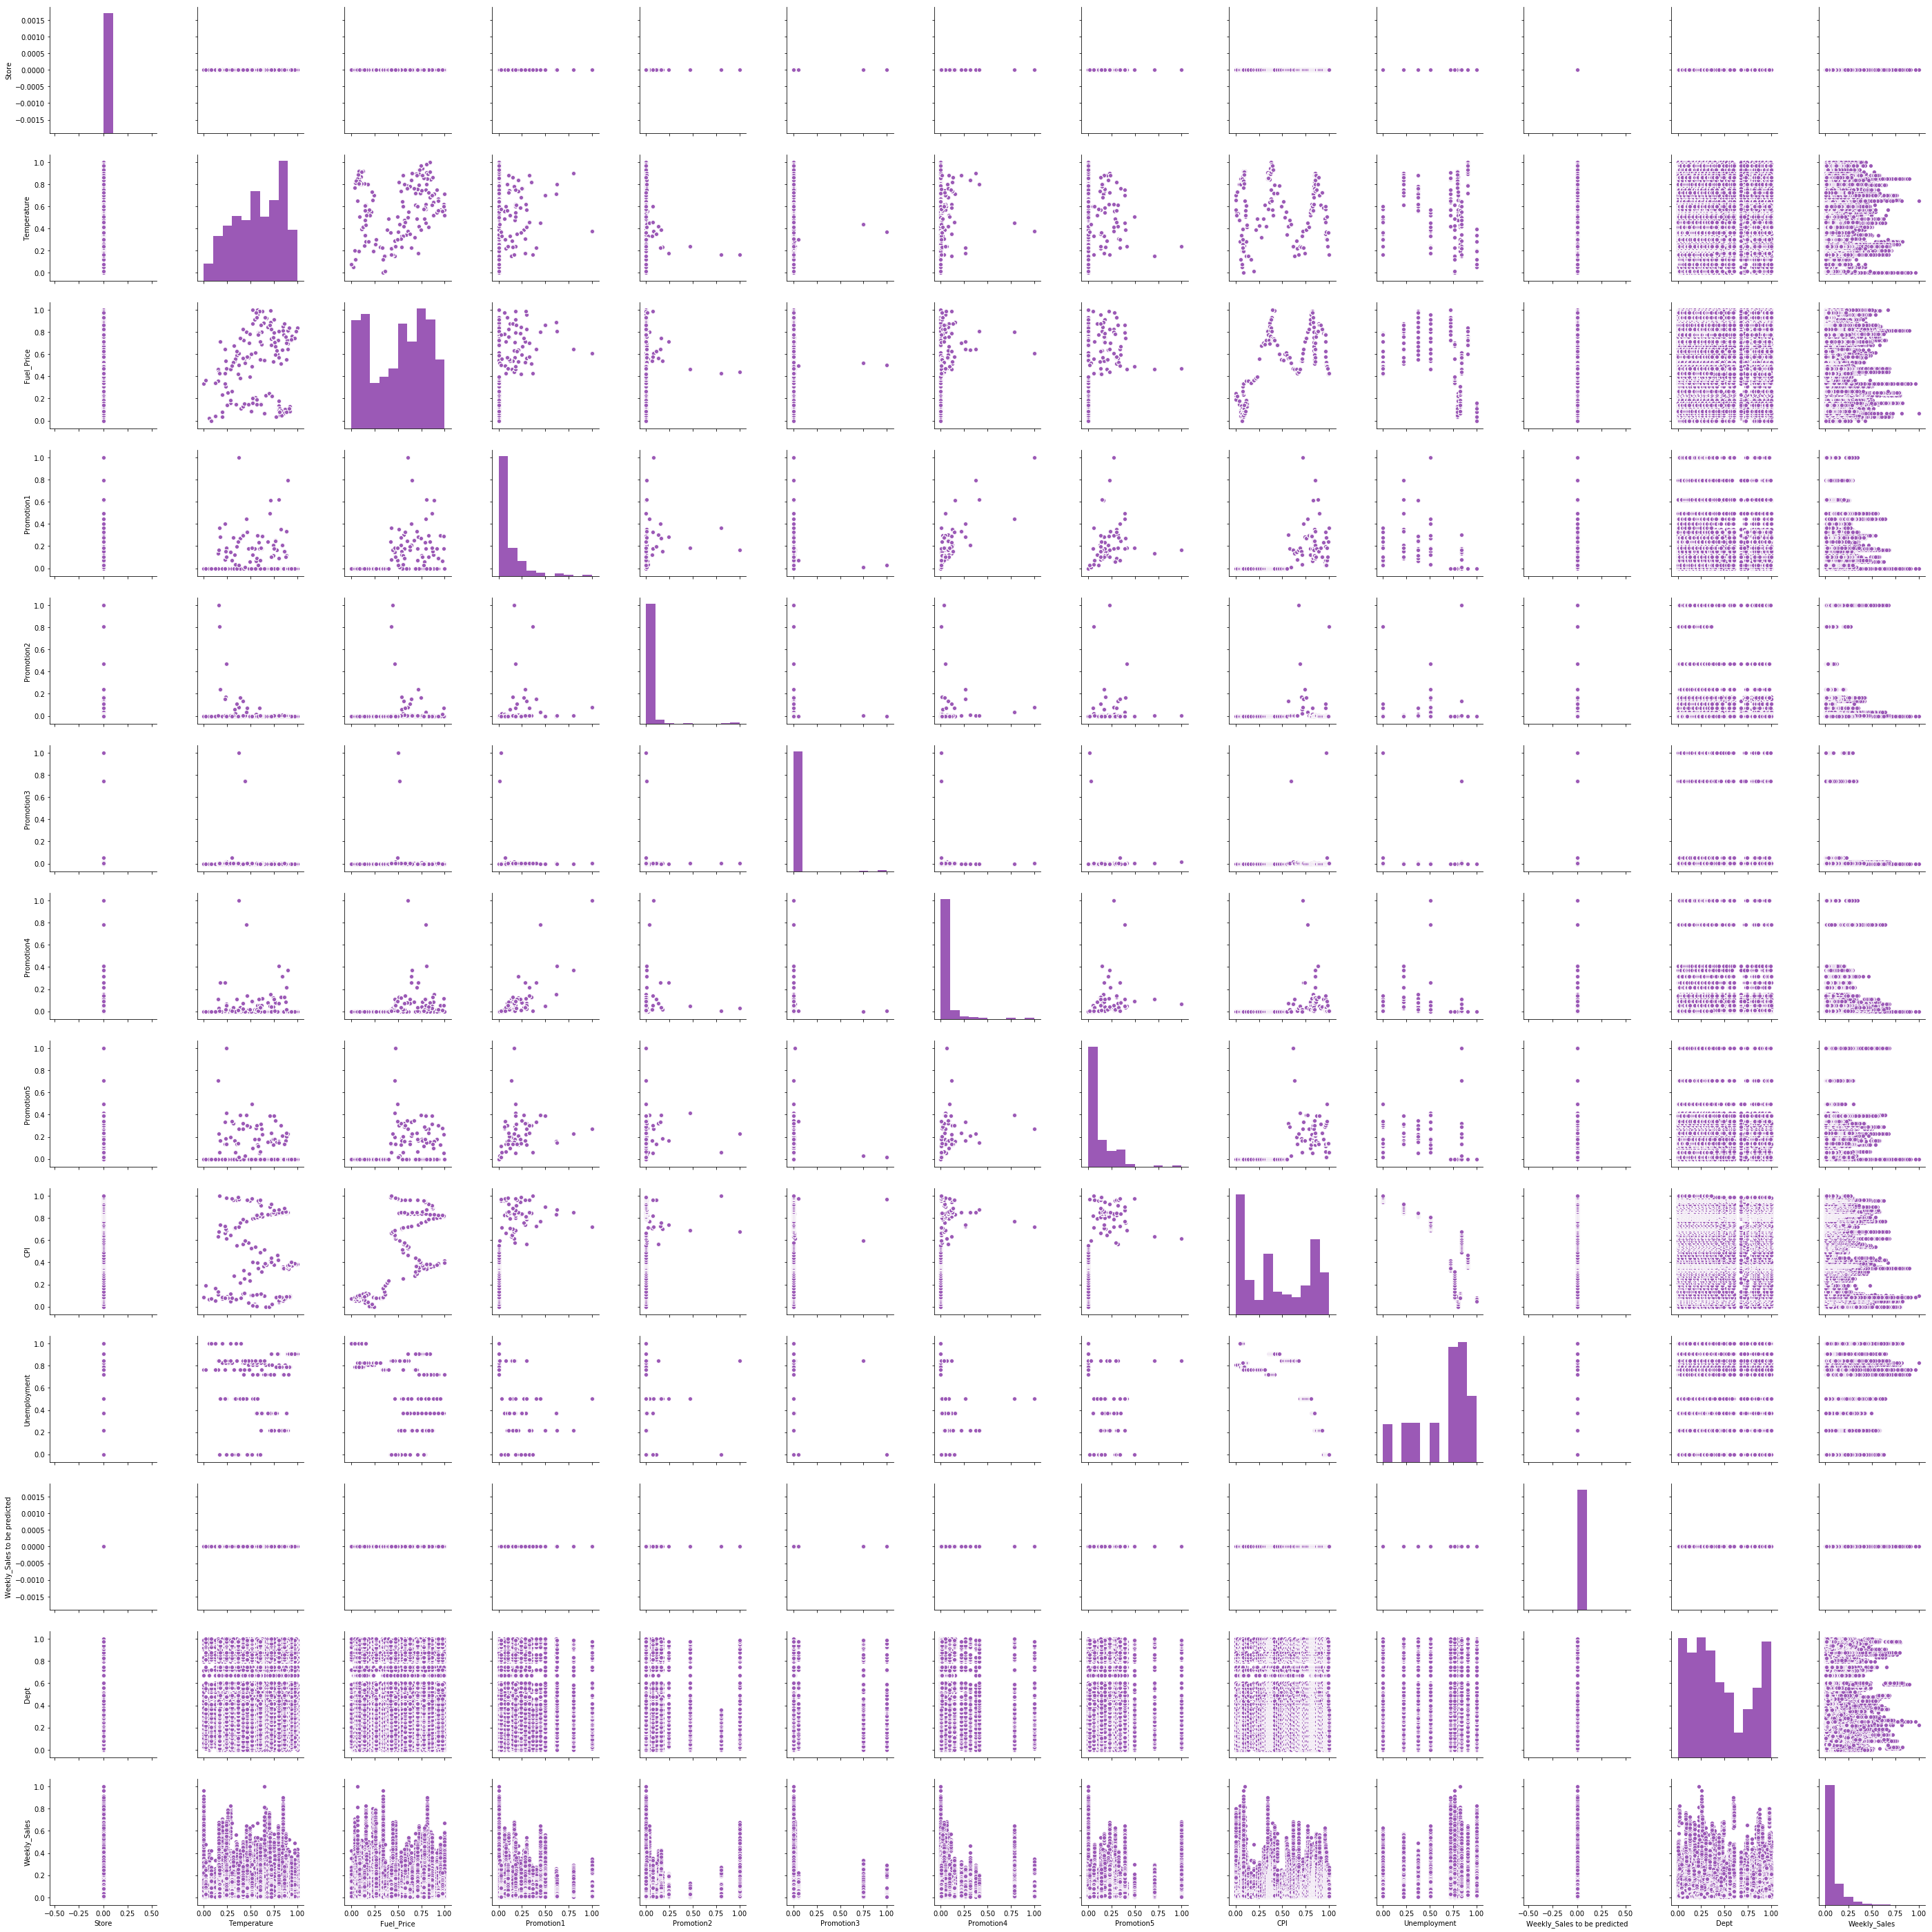

In [507]:
"""
We will now use pairplot from the Seaborn library which allows us to draw statistical plots based 
on Matplotlib. Once we visualise the data it would be easier to detect outliers.
"""

# This is the subset of columns I will be focusing on, these can be changed to include other columns as well.
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sea.set_palette(flatui)
sea.pairplot(data_from_2012_v2[columns_to_normalise], height = 3.0)
plt.tight_layout()
plt.show()